In [1]:
# Step 1
import math

# Takes two points and computes the Euclidean Distance between them
def euclideanDistance(a, b):
    distance = 0.0
    for i in range(len(a)):
        distance += (math.pow((a[i]-b[i]), 2))
    return math.sqrt(distance)

In [2]:
# Step 2
import math

# Takes two points and computes the Manhattan Distance between them
def manhattanDistance(a, b):
    manDis = 0.0
    for i in range(len(a)):
        manDis += (abs(a[i]-b[i]))
    return manDis

In [3]:
# Step 3
import numpy as np

# Returns the Accuracy and Generalization error if two vectors
def accuraryGeneralization(predicted, actual):
    accuracy = sum(np.array(predicted) == np.array(actual)) / float(len(actual))
    generalization = 1 - accuracy
    return accuracy, generalization


In [4]:
# Step 4

# Calculates Precision Values when inputs are TP and FP 
# that are based upon the probability and threshold
def precisions(tp, fp):
    score = []
    for i in range(len(tp)):
        precision = tp[i] / (tp[i] + fp[i])
        i += 1
        score.append(precision)
    return score

# Calculates Recall Values when inputs are TP and FN 
# that are based upon the probability and threshold
def recalls(tp, fn):
    score = []
    for i in range(len(tp)):
        recall = tp[i] / (tp[i] + fn[i])
        i += 1
        score.append(recall)
    return score


# Calculates Precision Score when input arguments are Test Labels and the 
# predicted labels
def precisionScore(yTest, yPredict):
    tp = sum((np.array(yTest) == 1) & (np.array(yPredict) == 1))
    fp = sum((np.array(yTest) == 0) & (np.array(yPredict) == 1))
    score = tp/(tp+fp)
    return score

# Calculates Recall Score when input arguments are Test Labels and the 
# predicted labels
def recallScore(yTest, yPredict):
    tp = sum((np.array(yTest) == 1) & (np.array(yPredict) == 1))
    fn = sum((np.array(yTest) == 1) & (np.array(yPredict) == 0))
    score = tp/(tp+fn)
    return score

# Calculates F1 Score when input arguments are Test Labels and the 
# predicted labels
def f1_score(yTest, yPredict):
    tp = sum((np.array(yTest) == 1) & (np.array(yPredict) == 1))
    fn = sum((np.array(yTest) == 1) & (np.array(yPredict) == 0))
    fp = sum((np.array(yTest) == 0) & (np.array(yPredict) == 1))
    score = tp / (tp + ((fn + fp) / 2))
    return score

In [5]:
# Step 5

# Generates the Confusion Matrix
def confusionMatrix(actual, predicted):
    confusionLists = np.unique(actual)
    matrixSize = len(confusionLists)
    matrix = np.zeros((matrixSize, matrixSize))
    for i in range (matrixSize):
        for j in range (matrixSize):
            matrix[i, j] = np.sum((actual == confusionLists[i]) & (predicted == confusionLists[j]))
    return matrix


In [6]:
# Step 6

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

# Generates the ROC Curve

def roc_curve(yTest, probability, label=None):
    fprList = []
    tprList = []
    
    thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    fpValues = []
    fnValues = []
    tpValues = []
    tnValues = []

    # Getting a new array of predictions based on the thresholds and the
    # array of probabilities of "1: Good Wine" in KNN
    for j in range(len(thresholds)):
        newValues = []
        for i in range(len(probability)):
            if (probability[i] < thresholds[j]):
                newValues.append(0)
            else:
                newValues.append(1)
        for k in range(len(newValues)):
        
            tp = sum((np.array(yTest) == 1) & (np.array(newValues) == 1))
            fn = sum((np.array(yTest) == 1) & (np.array(newValues) == 0))
            fp = sum((np.array(yTest) == 0) & (np.array(newValues) == 1))
            tn = sum((np.array(yTest) == 0) & (np.array(newValues) == 0))

        tpValues.append(tp)
        fnValues.append(fn)
        fpValues.append(fp)
        tnValues.append(tn)

    for i in range(len(fpValues)):
        fpr = fpValues[i]/(fpValues[i]+tnValues[i]) #False Positive Rate
        tpr = tpValues[i]/(tpValues[i]+fnValues[i]) #True Positive Rate
        
        #put point by point into list
        fprList.append(fpr)
        tprList.append(tpr)
        
    print(fprList)
    print(tprList)
    
    #Plotting
    fig = plt.figure(figsize=(10, 6))
    plt.plot(fprList, tprList, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()


In [7]:
# Step 7

import matplotlib.pyplot as plt

# Generates the AUC values
def AUC(yTest, probability):
    fprList = []
    tprList = []
    
    thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    fpValues = []
    fnValues = []
    tpValues = []
    tnValues = []

    # Getting a new array of predictions based on the thresholds and the
    # array of probabilities of "1: Good Wine" in KNN
    for j in range(len(thresholds)):
        newValues = []
        for i in range(len(probability)):
            if (probability[i] < thresholds[j]):
                newValues.append(0)
            else:
                newValues.append(1)
        for k in range(len(newValues)):
            tp = sum((np.array(yTest) == 1) & (np.array(newValues) == 1))
            fn = sum((np.array(yTest) == 1) & (np.array(newValues) == 0))
            fp = sum((np.array(yTest) == 0) & (np.array(newValues) == 1))
            tn = sum((np.array(yTest) == 0) & (np.array(newValues) == 0))

        tpValues.append(tp)
        fnValues.append(fn)
        fpValues.append(fp)
        tnValues.append(tn)

    for i in range(len(fpValues)):     
        fpr = fpValues[i]/(fpValues[i]+tnValues[i])
        tpr = tpValues[i]/(tpValues[i]+fnValues[i])
        #put point by point into list
        fprList.append(fpr)
        tprList.append(tpr)

    fprList = np.flip(fprList)
    tprList = np.flip(tprList)
    
    auc = np.trapz(tprList, fprList)
    
    return auc

In [8]:
#step8
import matplotlib.pyplot as plt
%matplotlib inline

# GEnerating the precision-recall curve
def precision_recall_curve(yTest, probability):
    
    thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    fpValues = []
    fnValues = []
    tpValues = []
    tnValues = []

    # Getting a new array of predictions based on the thresholds and the
    # array of probabilities of "1: Good Wine" in KNN
    for j in range(len(thresholds)):
        newValues = []
        for i in range(len(probability)):
            if (probability[i] < thresholds[j]):
                newValues.append(0)
            else:
                newValues.append(1)
        for k in range(len(newValues)):
            tp = sum((np.array(yTest) == 1) & (np.array(newValues) == 1))
            fn = sum((np.array(yTest) == 1) & (np.array(newValues) == 0))
            fp = sum((np.array(yTest) == 0) & (np.array(newValues) == 1))
            tn = sum((np.array(yTest) == 0) & (np.array(newValues) == 0))

        tpValues.append(tp)
        fnValues.append(fn)
        fpValues.append(fp)
        tnValues.append(tn)
    
    # Calculation precision values for TP and FP based on threshold and 
    # the array of probabilities of "1: Good Wine" in KNN
    precision = precisions(tpValues, fpValues)
    recall = recalls(tpValues, fnValues)

    fig = plt.figure(figsize=(10, 6))

    plt.plot(thresholds, precision, "b--", linewidth=8, label="Precision")
    plt.plot(thresholds, recall, "g-", linewidth=3, label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    # plt.xlim([0, 1])
    plt.ylim([0, 1.1])
    plt.show()

In [9]:
# Step 9

from math import *

# Calculation for inverse of distances for weights = distance
def inverseWeights(distance):
    if distance == 0:
         return 1
    else:
         return (1 / distance)

class KNN:
    
    # Storing the values as instance variables
    def __init__(self, X, y, n_neighbors, weights = "uniform", distanceCalc = "euclidean" ):
        self.X = X
        self.y = y
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.distanceCalc = distanceCalc
    
    # Predicting the labels for x_test
    def predict(self, X):  # test = x_test
        
        labels = []
        probabilityOne = []
        for x in X:
            distanceNeighbours = []
            KNearestNeighbours = []
            KNN = []
            labelValues = []
            weightsCalculated = []
            labelPredicted = []
            zeroCount = 0
            oneCount = 0
            totalWeightZero = 0
            totalWeightOne = 0
            
            
            # If weights is uniform
            if self.weights == "uniform":
                for index, i in enumerate(self.X):
                    
                    # Check if distance calculation type is Euclidean or
                    # manhattan
                    if self.distanceCalc == "euclidean":
                        distance = euclideanDistance(x, i)
                    elif self.distanceCalc == "manhattan":
                        distance = manhattanDistance(x, i)
                    # Append the distance and index of it in the array     
                    distanceNeighbours.append([distance, index])
                
                # Sort the distances to get K Nearest Neighbours    
                KNN = sorted(distanceNeighbours)
                KNearestNeighbours = KNN[:self.n_neighbors]
                
                # Get the label values of distances fro their index
                for distance, i in KNearestNeighbours:
                    labelValues.append(self.y[i])
                
                # Check how many K Nearest Neighbours have labels 0s and 1s
                for i in range(len(labelValues)):
                    if labelValues[i] == 0:
                        zeroCount += 1
                    elif labelValues[i] == 1:
                        oneCount += 1
                        
                # Calculate the probability of 1 in K Nearest Neighbours        
                probabilityOne.append(oneCount/(oneCount + zeroCount))      
                
                # Make a prediction based on total number of 1s and 0s
                if zeroCount > oneCount:
                    labelPredicted = 0
                elif zeroCount < oneCount:
                    labelPredicted = 1
                labels.append(labelPredicted)

            # If weights is distance
            elif self.weights == 'distance':
                for index, i in enumerate(self.X):
                    
                    # Check if distance calculation type is Euclidean or
                    # manhattan
                    if self.distanceCalc == "euclidean":
                        distance = euclideanDistance(x, i)
                    elif self.distanceCalc == "manhattan":
                        distance = manhattanDistance(x, i)
                    # Append the distance and index of it in the array     
                    distanceNeighbours.append([distance, index])
                    
                # Sort the distances to get K Nearest Neighbours
                KNN = sorted(distanceNeighbours)
                KNearestNeighbours = KNN[:self.n_neighbors]
                
                # Calculates the weights of K Nearest Neighbours and
                # Get the label values of inverse of distances fro their index
                for distance, i in KNearestNeighbours:
                    weightsCalculated = inverseWeights(distance)                      
                    labelValues.append([weightsCalculated, self.y[i]])
                
                # Calculate the sum of weights of 0s and 1s
                for i in range(len(labelValues)):
                    if labelValues[i][1] == 0:
                        totalWeightZero += labelValues[i][0]
                    if labelValues[i][1] == 1:
                        totalWeightOne += labelValues[i][0]
                        
                # Calculate the probability of 1 in K Nearest Neighbours based on weights 
                probabilityOne.append(totalWeightOne/(totalWeightOne + totalWeightZero))        
                        
                # Make a prediction based on the sum of weights of 1s and 0s
                if totalWeightZero > totalWeightOne:
                    labelPredicted = 0
                elif totalWeightZero < totalWeightOne:
                    labelPredicted = 1
                labels.append(labelPredicted)
        
        # Returns Predicted Labels and Probabilities of 1s
        return labels, probabilityOne
    

In [10]:
# Step 10
import pandas as pd

# Read the CSV as a Pandas Data Frame
df = pd.read_csv('winequality-white.csv', sep = ';', skipinitialspace=True)

In [11]:
# Step 11

# Renaming the quality column to target
df.rename(columns={'quality':'target'}, inplace=True)

# Categorize the target at good quality wine (1) or bad quality wine (0)
def categorizeQualityData(dataFrame, columnName):
    for i in range(dataFrame.shape[0]):
        if dataFrame[columnName][i] > 5:
            dataFrame[columnName][i] = 1
        else:
            dataFrame[columnName][i] = 0  
    return 

categorizeQualityData(df, 'target')
df.head()

## Ignore the warning

<ipython-input-11-eff067617221>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[columnName][i] = 1
<ipython-input-11-eff067617221>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[columnName][i] = 0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [12]:
# Step 12

# Summarize each of the variables in the dataset
# in terms of mean, standard deviation, and quartiles
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [13]:
# Step 13

#Shuffling the rows of the data
df = df.sample(frac=1) 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
836,7.3,0.25,0.36,2.1,0.034,30.0,177.0,0.99085,3.25,0.40,11.9,1
2316,7.4,0.20,0.31,1.6,0.038,34.0,116.0,0.99120,3.25,0.39,12.0,1
2556,7.6,0.23,0.64,12.9,0.033,54.0,170.0,0.99800,3.00,0.53,8.8,0
3855,5.9,0.18,0.29,4.6,0.032,68.0,137.0,0.99159,3.21,0.38,11.3,1
334,5.6,0.26,0.26,5.7,0.031,12.0,80.0,0.99230,3.25,0.38,10.8,0


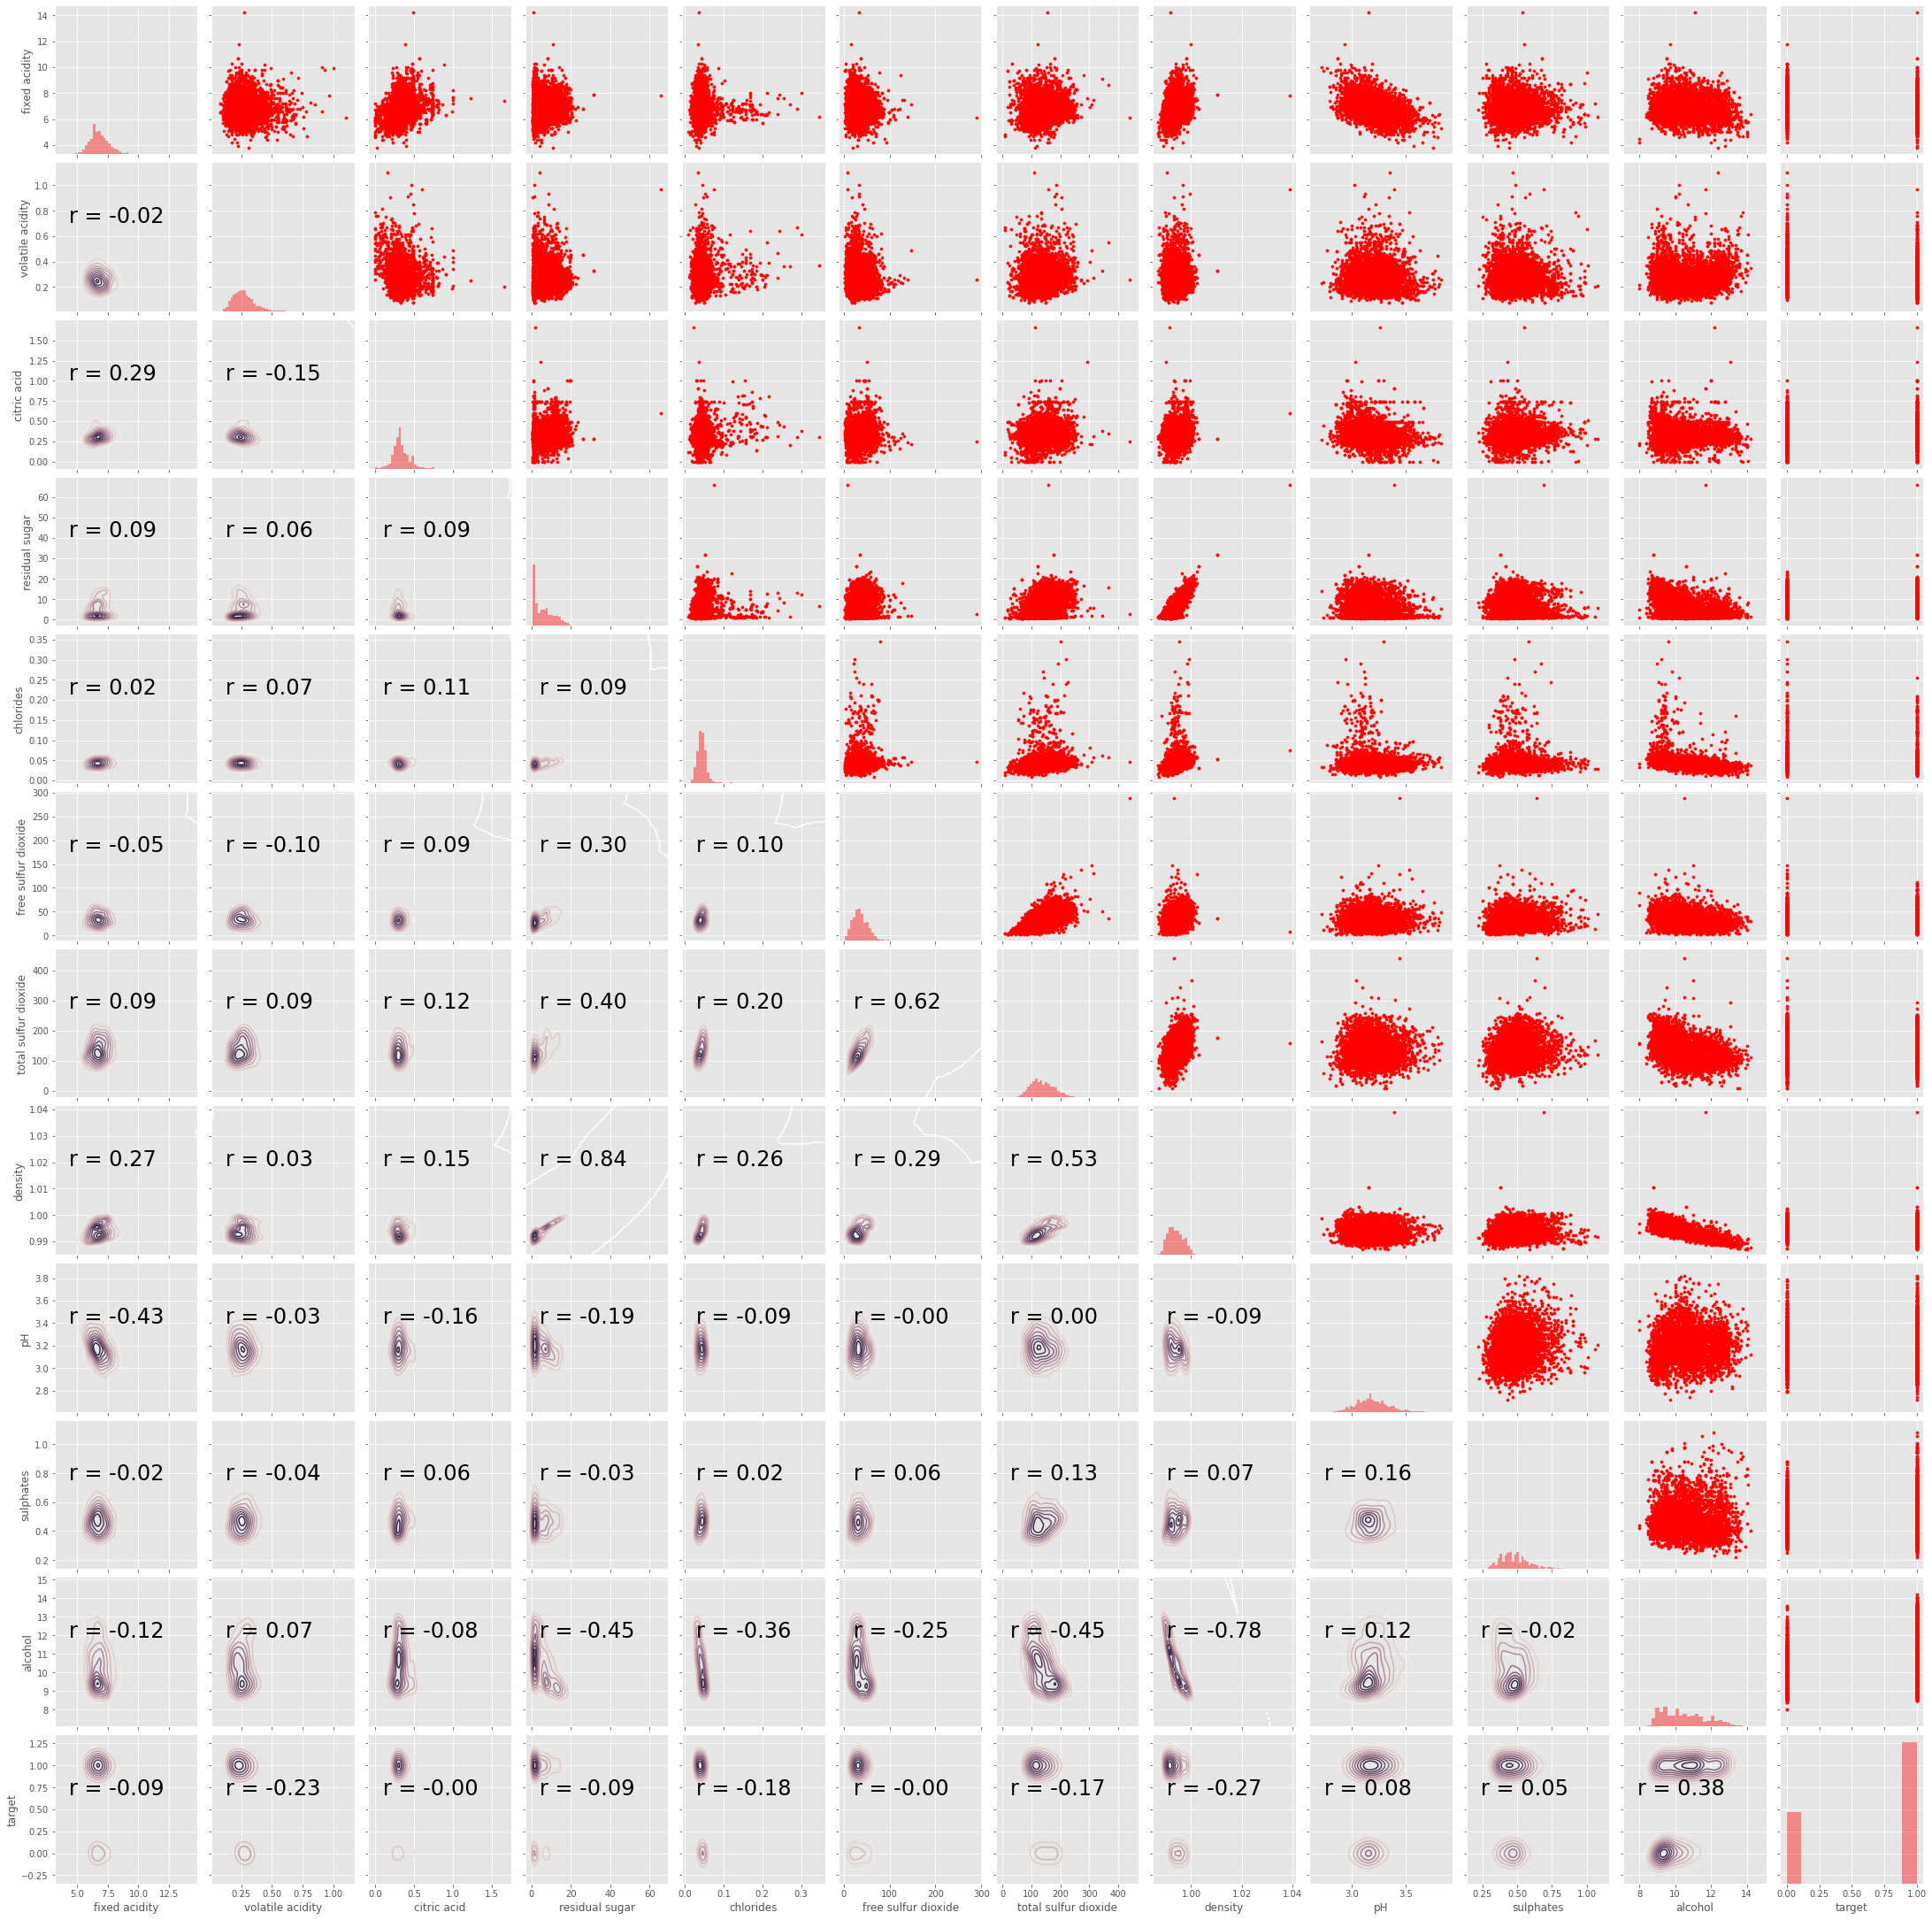

In [14]:
# Step 14

# Generating the pair plot using the seaborn package
import warnings
warnings.filterwarnings('ignore')

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [15]:
# Step 15

# Dropping the redundant features
df = df.drop(columns=[ 'citric acid', 'sulphates', 'residual sugar'])

In [16]:
# Creating a copy of the data frame
dfStandard = df.copy()

In [17]:
#step16

# Splitting the data into Train Set and Test Set
def partition(X,y,t):
    x_train = np.array(X[int((len(X)+1)*t):])
    x_test = np.array(X[:int((len(X)+1)*t)])
    y_train = np.array(y[int((len(y)+1)*t):])
    y_test = np.array(y[:int((len(y)+1)*t)]) 
    return x_train, x_test, y_train, y_test

#separate the target vector and features
def separateTargetVector(dataSet):
    y = dataSet['target'] #target vector
    X = dataSet.drop(columns='target') #features matrix
    t = 0.2
    return X,y,t

In [19]:
# # Step 17

# 17.a
#Naively run KNN_Classifier with df, K = 5 using Euclidean distance
def calculateDf(df, weights):
    X,y,t = separateTargetVector(df)
    xTrain,xTest,yTrain,yTest = partition(X,y,t)
    
    if weights == "uniform":
        model = KNN(xTrain, yTrain, 5)
        yPredict, probability = model.predict(xTest)
        accuracyDf = sum(np.array(yPredict) == np.array(yTest)) / float(len(yTest))
        scoreF1Df = f1_score(yTest, yPredict)
    elif weights == "distance":
        model = KNN(xTrain, yTrain, 5, weights = "distance")
        yPredict, probability = model.predict(xTest)
        accuracyDf = sum(np.array(yPredict) == np.array(yTest)) / float(len(yTest))
        scoreF1Df = f1_score(yTest, yPredict)
        
    return accuracyDf, scoreF1Df

#17.b
#function to standardize the data
def standardizeData(dataSet):
    for key, values in dataSet.iteritems():
        mean = dataSet[key].mean()
        std = dataSet[key].std()
        if key != 'target':
            dataSet[key] = (dataSet[key] - mean) / std
    return dataSet

dfStandard = standardizeData(dfStandard)

# 17.c
#Naively run KNN_Classifier with dfStandard
def calculateDFStandard(dfStandard, weights):
    X,y,t = separateTargetVector(dfStandard)
    xTrain,xTest,yTrain,yTest = partition(X,y,t)
    
    if weights == "uniform":
        model = KNN(xTrain, yTrain, 5)
        yPredict,probability = model.predict(xTest)
        accuracyDfStd = sum(np.array(yPredict) == np.array(yTest)) / float(len(yTest))
        scoreF1DfStd = f1_score(yTest, yPredict)
    elif weights == "distance":
        model = KNN(xTrain, yTrain, 5, weights = "distance")
        yPredict,probability = model.predict(xTest)
        accuracyDfStd = sum(np.array(yPredict) == np.array(yTest)) / float(len(yTest))
        scoreF1DfStd = f1_score(yTest, yPredict)
    return accuracyDfStd, scoreF1DfStd

accuracy, scoreF1 = calculateDf(df, "uniform")

print("Accuracy for Non-Standardized Data: %f" %accuracy)
print("f1_score for Non-Standardized Data: %f" %scoreF1)

accuracyDfStd, scoreF1DfStd = calculateDFStandard(dfStandard, "uniform")

print("Accuracy for Standardized Data: %f" %accuracyDfStd)
print("f1_score for Standardized Data: %f" %scoreF1DfStd)

# 17.d -> In the report

# 17.e 
accuracyWeighted, scoreF1Weighted = calculateDf(df, "distance")

print("Accuracy for Non-Standardized Data, Weighted: %f" %accuracyWeighted)
print("f1_score for Non-Standardized Data, Weighted: %f" %scoreF1Weighted)

accuracyDfStdWeighted, scoreF1DfStdWeighted = calculateDFStandard(dfStandard, "distance")

print("Accuracy for Standardized Data, Weighted: %f" %accuracyDfStdWeighted)
print("f1_score for Standardized Data, Weighted: %f" %scoreF1DfStdWeighted)



Accuracy for Non-Standardized Data: 0.719101
f1_score for Non-Standardized Data: 0.797645
Accuracy for Standardized Data: 0.776302
f1_score for Standardized Data: 0.834966
Accuracy for Non-Standardized Data, Weighted: 0.742594
f1_score for Non-Standardized Data, Weighted: 0.812779
Accuracy for Standardized Data, Weighted: 0.778345
f1_score for Standardized Data, Weighted: 0.835232


In [20]:
#a function to split data into partition
#according to the number of folds
def partitionSplit(df, folds):
    s_partition = []
    dfCopy = df
    #set the size for each partiton
    eachPartition = int(df.shape[0] / folds)
    for i in range(folds):
        partition = []
        #going through each partition
        for j in range(eachPartition):
            if(len(partition) < eachPartition):
                value = dfCopy.index[0]
                partition.append(value.tolist())
                dfCopy = dfCopy.drop(value)
        s_partition.append((np.asarray(partition)).tolist())
  
    return s_partition


In [79]:
#step18

#function to calculate the mean squared error
def meanSquaredError(yTest, yPredict):
    mse = np.square(np.subtract(yTest, yPredict)).mean() 
    return mse

#function for the s-fold validation
def sFold(folds, data, labels, model, error_function, dictionary): 
    avgF1Score = [] 
    splitX = partitionSplit(data, folds)

    #loop to choose a partition as validation set
    for i, partition in enumerate(splitX):
        trainSet = list(splitX)
        del(trainSet[i])       #dropping the validation set
        trainSet = sum(trainSet, [])

        testSet = []           #getting the validation set 
        for row in partition:
            testSet.append(row)  #put data in validation set into a new list 
            
        #splitting the data into train and test set
        xTrainValues = []
        yTrainValues = []        
        for trainIndex in trainSet:
            xTrainValues.append(data.loc[trainIndex])
            yTrainValues.append(labels.loc[trainIndex])

        #splitting the validation set data into train and test set
        xTestValues = []
        yTestValues = []
        for testIndex in testSet:
            xTestValues.append(data.loc[testIndex])
            yTestValues.append(labels.loc[testIndex])
    
        #preform prediction using KNN
        if model == 'KNN':
            modelClassifier = KNN(xTrainValues, yTrainValues , dictionary.get('k'), weights = dictionary.get('weights'), distanceCalc = dictionary.get('distance'))
            yPredict, probability = modelClassifier.predict(xTestValues)
            accuracy = sum(np.array(yPredict) == np.array(yTestValues)) / float(len(yTestValues))
            print('Accuracy: %.3f' %accuracy)
            
            #calculating the error using f1 score
            if error_function == "f1":
                error = 1 - (f1_score(yTestValues, yPredict))
                avgF1Score.append(error)
            else:
                error = meanSquaredError(yTestValues, yPredict)
            print("K: %d" %dictionary.get('k'))
            print("Distance: %s" %dictionary.get('distance')) 
            print("Weights: %s" %dictionary.get('weights'))
            print('F1 Score: %.3f' %(1 - error))
            print('Error: %.3f' %error)
            print('\n')
      
    #get the average f1 score for the current k
    avgFinalF1Score = sum(avgF1Score) / len(avgF1Score) 
    print(avgFinalF1Score) 
    print('\n')

    return {'expected labels': yTestValues, 'predicted labels': yPredict, 'errors': [error]}

In [80]:
#Step 19

#get the X data(features without target) and y data(target column)
X,y,t = separateTargetVector(dfStandard)

#function to pass the hyperparameter into s-fold validation
def dictionary(k, distance, weights):
    modelArgs = dict()
    #form the dictionary
    for eachK in k:
        for eachWeights in weights:
            for eachDistance in distance:
                modelArgs = {'k': eachK,'distance' :  eachDistance,'weights': eachWeights}
                #use of s-folds
                out = sFold(5, X, y, 'KNN', 'f1', modelArgs)

k = [1,5,9,11]
distance = ['euclidean','manhattan']
weights = ['uniform', 'distance']

dictionary(k,distance,weights)


Accuracy: 0.810
K: 1
Distance: euclidean
Weights: uniform
F1 Score: 0.855
Error: 0.145


Accuracy: 0.804
K: 1
Distance: euclidean
Weights: uniform
F1 Score: 0.850
Error: 0.150


Accuracy: 0.800
K: 1
Distance: euclidean
Weights: uniform
F1 Score: 0.849
Error: 0.151


Accuracy: 0.813
K: 1
Distance: euclidean
Weights: uniform
F1 Score: 0.859
Error: 0.141


Accuracy: 0.790
K: 1
Distance: euclidean
Weights: uniform
F1 Score: 0.846
Error: 0.154


0.14800169624923237


Accuracy: 0.805
K: 1
Distance: manhattan
Weights: uniform
F1 Score: 0.850
Error: 0.150


Accuracy: 0.804
K: 1
Distance: manhattan
Weights: uniform
F1 Score: 0.849
Error: 0.151


Accuracy: 0.803
K: 1
Distance: manhattan
Weights: uniform
F1 Score: 0.853
Error: 0.147


Accuracy: 0.823
K: 1
Distance: manhattan
Weights: uniform
F1 Score: 0.867
Error: 0.133


Accuracy: 0.784
K: 1
Distance: manhattan
Weights: uniform
F1 Score: 0.844
Error: 0.156


0.14737756553259473


Accuracy: 0.810
K: 1
Distance: euclidean
Weights: distance
F1 Scor

{'k': 11, 'distance': 'manhattan', 'weights': 'distance'}

In [ ]:
# From evaluating our model, we get the most optimum hyperparameters for: 
# K = 9, Weights = Distance, Disctance Calculation = Manhattan 
# Then we run the KNN with those hyperparameters and get Precision,
# Recall, F1 Score, Confusion Matrix and Accuracy and Generalization Error

X,y,t = separateTargetVector(dfStandard)
xTrain, xTest, yTrain, yTest = partition(X, y, t)
model = KNN(xTrain, yTrain, 9, weights = "distance", distanceCalc = "manhattan")
y_train_predict, probability = model.predict(xTest)
y_predict = np.array(y_train_predict)

# Step 20

accuracy = accuraryGeneralization(yTest, y_predict)
ModelAccuracy = accuracy[0]

print("Step 20:")
print('Precision:', precisionScore(yTest, y_predict))
print('Recall:', recallScore(yTest, y_predict))
print('F1 score:', f1_score(yTest, y_predict))
print('Accuracy and Generalization Error:', accuraryGeneralization(yTest, y_predict))
print('Confusion Matrix:', confusionMatrix(yTest, y_predict))
print("\n")

# Step 21
# Plot the ROC Curve
print("Step 21:")
roc_curve(yTest, probability)
print("\n")

# Step 22
# Get the AUC Value
print("Step 22:")
auc = AUC(yTest, probability)
print("AUC: %f" %auc)
print("\n")

# Step 23
# Generate the Precision-Recall Curve
print("Step 23:")
precision_recall_curve(yTest, probability)
print("\n")

#Step 24
from math import sqrt

# Calculate the 95% confidenceinterval 
# on the generalization error estimate.
def confidenceInterval(z, accuracy, n):
    result = z * sqrt((accuracy * (1 - accuracy)) / n)
    print('Confidence Interval: %.3f' % result)
    
confidenceInterval(1.96, ModelAccuracy, 9)


Step 20:
Precision: 0.8318713450292398
Recall: 0.8808049535603715
F1 score: 0.8556390977443609
Accuracy and Generalization Error: (0.8038815117466803, 0.19611848825331968)
Confusion Matrix: [[218. 115.]
 [ 77. 569.]]


Step 21:
